# Статистический анализ данных. Проектная работа.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Импортируем все необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math
pd.options.display.float_format = '{:.2f}'.format

## Изучение данных из файлов

Создадим переменные с таблицами и познакомимся с данными, поищем общие столбцы для дальнейшего объединения в единый датасет.

### Звонки

In [2]:
calls=pd.read_csv('D:\\DS\\Портфолио\\3-Статистический анализ данных\\calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.describe()

,duration,user_id
count,202607.00,202607.00
mean,6.76,1253.94
std,5.84,144.72
min,0.00,1000.00
25%,1.30,1126.00
50%,6.00,1260.00
75%,10.70,1379.00
max,38.00,1499.00


In [5]:
calls.duplicated().sum()

0

**Вывод:**

Что имеем из данных:

Пропуски - 0 (ничего делать не нужно)

Дубликаты - 0 (ничего делать не нужно)

Тип данных: требуется замена типа данных call_date c object на datetype. А так же окургление в большую сторону и смена формата float на int в столбце duration, исходя из данных тарифа, потраченная пользователем секуна с новой минуты будет считаться минутой.

Нулевые звонки: Исходя из поставленной задачи, нам необходимо учитывать сколько минут/сообщений/трафика тратили пользователи. Звонки с нулевым временем не повлияют на количество минут. этими данными можно принебречь. Избавимся от них в разделе "Предобработка данных".

### Интернет

In [6]:
internet=pd.read_csv('D:\\DS\\Портфолио\\3-Статистический анализ данных\\internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.00,149396.00,149396.00
mean,74697.50,370.19,1252.10
std,43127.05,278.30,144.05
min,0.00,0.00,1000.00
25%,37348.75,138.19,1130.00
50%,74697.50,348.01,1251.00
75%,112046.25,559.55,1380.00
max,149395.00,1724.83,1499.00


In [9]:
internet.duplicated().sum()

0

**Вывод:**

Что имеем из данных:

Пропуски - 0 (ничего делать не нужно)

Дубликаты - 0 (ничего делать не нужно)

Типы данных: тип данных в столбце session_date необходимо перевести в datetype. Мегабайты тоже можно округлить и перевести в int, так как в современном мире 1 Мб - очень маленький объем контента.

### Сообщения

In [10]:
messages=pd.read_csv('D:\\DS\\Портфолио\\3-Статистический анализ данных\\messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages.describe()

,user_id
count,123036.00
mean,1256.99
std,143.52
min,1000.00
25%,1134.00
50%,1271.00
75%,1381.00
max,1499.00


In [13]:
messages.duplicated().sum()

0

**Вывод:**

Что имеем из данных:

Пропуски - 0 (ничего делать не нужно)

Дубликаты - 0 (ничего делать не нужно)

Типы данных: тип данных в столбце message_date необходимо перевести в datetype.


### Тарифы

In [14]:
tariffs=pd.read_csv('D:\\DS\\Портфолио\\3-Статистический анализ данных\\tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Смениим название колонки tarrif_name на tariff, это будет необходимо для слияния данной таблицы с таблицей пользователей.

In [15]:
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод:** 

C данными по тарифам все хорошо.

### Пользователи

In [17]:
users=pd.read_csv('D:\\DS\\Портфолио\\3-Статистический анализ данных\\users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
users.describe()

,user_id,age
count,500.00,500.00
mean,1249.50,46.59
std,144.48,16.67
min,1000.00,18.00
25%,1124.75,32.00
50%,1249.50,46.00
75%,1374.25,62.00
max,1499.00,75.00


In [20]:
users.duplicated().sum()

0

**Вывод:**

Что имеем из данных:

Пропуски - 0 (ничего делать не нужно)

Дубликаты - 0 (ничего делать не нужно)

Исходя из поставленной задачи, нам понадобится user_id, tariff, city.

### Вывод:

Мы познакомились с данными и определили список задач для каждой таблицы. Далее нам необходимо заняться предобработкой данных.

## Предобработка данных

В данной главе мы будем убирать ненужные строки с данными, менять типы данных, вычислять необходимые для анализа данные, создавать сводные таблицы, а так же создавать единый фрейм для дальнейшего анализа.

### Убираем ненужные данные

Среди всех таблиц, только таблица со звонками содержит ненужные нам данные. Уберем их.

In [21]:
#фильтруем данные
calls = calls.loc[calls['duration'] != 0.00]
#проверяем
calls.describe()

,duration,user_id
count,162994.00,162994.00
mean,8.40,1254.15
std,5.35,144.75
min,0.01,1000.00
25%,4.17,1126.00
50%,7.74,1261.00
75%,11.85,1379.00
max,38.00,1499.00


**Вывод:**

Отлично, теперь мы видим, что минимальное значение в таблице 0.01. Помним, что по условиям тарифа такой звонок будет приравнен к одной минуте.

### Работа с типами данных

В этой главе мы будем последовательно в каждой таблице менять типы дынных, а также производить округления, так как эта операци необходима перед тем как сменить тип данных с float на int.

#### Звонки

Сперва округлим данные длительности звонков, затем сменим тип данных с float на int, а потом сменим object на datetype.

In [22]:
calls['duration']=np.ceil(calls['duration'])

#проверяем
calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.00,1000
3,1000_3,2018-09-21,14.00,1000
4,1000_4,2018-12-15,6.00,1000
7,1000_7,2018-08-22,19.00,1000
8,1000_8,2018-09-15,19.00,1000


In [23]:
#меняем тип данных на int:
calls['duration']=calls['duration'].astype('int')

#Проверяем 
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         162994 non-null  object
 1   call_date  162994 non-null  object
 2   duration   162994 non-null  int32 
 3   user_id    162994 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 5.6+ MB


Теперь поменяем формат даты:

In [24]:
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#Проверяем 
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  int32         
 3   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.6+ MB


**Вывод:**
Мы сделали все необходимые операции с таблицей звонков.

#### Интернет

Сперва округлим данные трафика, затем сменим тип данных с float на int, а потом сменим object на datetype.

In [25]:
internet['mb_used']=np.ceil(internet['mb_used'])

#проверяем
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.00,2018-11-25,1000
1,1,1000_1,1053.00,2018-09-07,1000
2,2,1000_2,1198.00,2018-06-25,1000
3,3,1000_3,551.00,2018-08-22,1000
4,4,1000_4,303.00,2018-09-24,1000


In [26]:
#меняем тип данных на int:
internet['mb_used']=internet['mb_used'].astype('int')

#Проверяем 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    149396 non-null  int64 
 1   id            149396 non-null  object
 2   mb_used       149396 non-null  int32 
 3   session_date  149396 non-null  object
 4   user_id       149396 non-null  int64 
dtypes: int32(1), int64(2), object(2)
memory usage: 5.1+ MB


Теперь поменяем формат даты:

In [27]:
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

#Проверяем 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  int32         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 5.1+ MB


**Вывод:**
Мы сделали все необходимые операции с таблицей интернет-трафика.

#### Сообщения

В таблице сообщений нам необходимо обработать только формат даты:

In [28]:
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

#Проверяем 
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  int32         
 3   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.6+ MB


**Вывод:**
Мы сделали все необходимые операции с таблицей сообщений

### Вычисление необходимых данных

Исходя из задачи нам необходимо вычислить следующие данные:

-количество сделанных звонков и израсходованных минут разговора по месяцам;

-количество отправленных сообщений по месяцам;

-объем израсходованного интернет-трафика по месяцам;

-помесячную выручку с каждого пользователя 

Для вычисления всех этих данных нам необходима группировка данных по конкретному клиенту (его мы определим по user_id) по месяцам, для этого нам необходимо добавить столбец с указанием месяца. Для кадого фрейма.

In [29]:
calls['month']=pd.DatetimeIndex(calls['call_date']).month

#проверяем
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9


In [30]:
internet['month']=pd.DatetimeIndex(internet['session_date']).month

#проверяем
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


In [31]:
messages['month']=pd.DatetimeIndex(messages['message_date']).month

#проверяем
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Отлично! Начнем создавать сводные таблицы.

#### Звонки

Посчитаем, сколько минут в каждом месяце и какое количество звонков тратят пользователи.

In [32]:
pivot_calls=calls.pivot_table(
    index=['user_id', 'month',],
    values='duration', 
    aggfunc=['sum', 'count'])

#Поправим названия столбцов:
pivot_calls.columns=['sum_duration', 'qty_calls']
pivot_calls.head()

sum_duration  qty_calls
user_id month                         
1000    5               159         17
        6               172         28
        7               340         41
        8               408         42
        9               466         46

#### Интернет

In [33]:
pivot_internet=internet.pivot_table(
    index=['user_id', 'month'],
    values='mb_used', 
    aggfunc=['sum'])

#Поправим названия столбцов:
pivot_internet.columns=['sum_mb_used']
pivot_internet.head()

sum_mb_used
user_id month             
1000    5             2256
        6            23257
        7            14016
        8            14070
        9            14581

#### Сообщения

In [34]:
pivot_messages=messages.pivot_table(
    index=['user_id', 'month'],
    values='id', 
    aggfunc=['count'])

#Поправим названия столбцов:
pivot_messages.columns=['sum_sms_used']
pivot_messages.head()

sum_sms_used
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57

### Объединение таблиц

Объединим данные звонков, интернета и сообщений

In [35]:
df=pivot_calls.merge(pivot_internet, on=['user_id', 'month'], how='outer')

#Проверяем
df.head()

sum_duration  qty_calls  sum_mb_used
user_id month                                      
1000    5            159.00      17.00      2256.00
        6            172.00      28.00     23257.00
        7            340.00      41.00     14016.00
        8            408.00      42.00     14070.00
        9            466.00      46.00     14581.00

In [36]:
df=df.merge(pivot_messages, on=['user_id', 'month'], how='outer')

#Проверяем
df.head()         

sum_duration  qty_calls  sum_mb_used  sum_sms_used
user_id month                                                    
1000    5            159.00      17.00      2256.00         22.00
        6            172.00      28.00     23257.00         60.00
        7            340.00      41.00     14016.00         75.00
        8            408.00      42.00     14070.00         81.00
        9            466.00      46.00     14581.00         57.00

In [37]:
#Сбросим индексы
df=df.reset_index()

Добалвяем информацию о пользователях:

In [38]:
df=df.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')

#Проверяем
df.head()

,user_id,month,sum_duration,qty_calls,sum_mb_used,sum_sms_used,tariff,city
0,1000,5,159.00,17.00,2256.00,22.00,ultra,Краснодар
1,1000,6,172.00,28.00,23257.00,60.00,ultra,Краснодар
2,1000,7,340.00,41.00,14016.00,75.00,ultra,Краснодар
3,1000,8,408.00,42.00,14070.00,81.00,ultra,Краснодар
4,1000,9,466.00,46.00,14581.00,57.00,ultra,Краснодар


Добавляем данные о тарифах пользователей

In [39]:
df=df.merge(tariffs,on='tariff',how='outer' )

#Проверяем
df.head()

,user_id,month,sum_duration,qty_calls,sum_mb_used,sum_sms_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.00,17.00,2256.00,22.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,172.00,28.00,23257.00,60.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,340.00,41.00,14016.00,75.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,408.00,42.00,14070.00,81.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,466.00,46.00,14581.00,57.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1


### Рассчет выручки 

Напишем функцию для вычисления выручки

In [40]:
def revenue(row):
    '''
    Вычисляет суммарную выручку с клиента.
    ======================================
    
    Аргументы:
                    row (object): Строка датафрейма.

    Возвращает:
                    revenue (int): Сумма абонентской платы и перерасхода пакета услуг.
    '''
    
    revenue = row['rub_monthly_fee']
    

    revenue += int(max(0, (row['sum_duration']-row['minutes_included']) * row['rub_per_minute'] ) + 
                max(0, np.ceil((row['sum_mb_used']-row['mb_per_month_included'])/1024) * row['rub_per_gb'] )+
                max(0, (row['sum_sms_used']-row['messages_included']) * row['rub_per_message']) )
   
    return revenue


print('Строка документации: \n', revenue.__doc__)

Строка документации: 
 
    Вычисляет суммарную выручку с клиента.
    
    Аргументы:
                    row (object): Строка датафрейма.

    Возвращает:
                    revenue (int): Сумма абонентской платы и перерасхода пакета услуг.
    


Добавим столбец с выручкой, заполнив его при помощи вышенаписанной функции

In [41]:
df['revenue']=df.apply(revenue, axis=1)

#Проверим
df['revenue'].describe()

count   3214.00
mean    1532.59
std      799.65
min      550.00
25%      750.00
50%     1667.50
75%     1950.00
max     6770.00
Name: revenue, dtype: float64

### Вывод:

Мы получили единый фрейм со всеми необходиыми данным для выполнения статистического анализа данных. Приступим к анализу и проверке гипотез.

## Анализ данных

В этой главе перед нам необходимо провести анализ и выяснить:

- Сколько минут разговора, сколько сообщений, и какой объем интернет трафика требуется пользователям каждого тарифа в месяц?

- Вычислить среднее количество, дисперсию и стандартное отклонение

- Построить гистограммы и описать распределения

### Минуты, сообщения, трафик

#### Тариф ultra

При помощи логической индексации выберем тариф "ultra" и вычислим все необходимы данные. Для вычисления дисперсии учтем, что у нас выборка из совокупности

В ходе дальнейшего анализа нам будет необходимо строить графики, напишем функцию для построения

In [42]:
def graphics(data, column, title, x, y):
    '''
    Функция строит гистограмму распределения и "ящик с усами"
    ======================================
    
    Аргументы:
                    data (DataFrame): Датасет для построения.
                    column (string): Имя столбца по которому необходимо строить даныне
                    title (string): Подпись гистограммы
                    x (string): Подпись оси "х" гистограммы
                    y (string): Подпись оси "y" гистограммы
                    

    Возвращает:
                    (object): Гистограмму распределения.
                    (object): "Ящик с усами".
    '''
    data[column].plot.hist(alpha=0.5, legend=True)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    sns.boxplot(data=data, x=column)
    
print('Строка документации: \n', graphics.__doc__)

Строка документации: 
 
    Функция строит гистограмму распределения и "ящик с усами"
    
    Аргументы:
                    data (DataFrame): Датасет для построения.
                    column (string): Имя столбца по которому необходимо строить даныне
                    title (string): Подпись гистограммы
                    x (string): Подпись оси "х" гистограммы
                    y (string): Подпись оси "y" гистограммы
                    

    Возвращает:
                    (object): Гистограмму распределения.
                    (object): "Ящик с усами".
    


##### Минуты

In [43]:
df[df['tariff']=='ultra']['sum_duration'].describe()

count    947.00
mean     547.76
std      305.51
min        1.00
25%      311.00
50%      529.00
75%      758.00
max     1673.00
Name: sum_duration, dtype: float64

In [44]:
minute_variance=round(np.var(df[df['tariff']=='ultra']['sum_duration'], ddof=1), 2)
minute_variance

93338.43

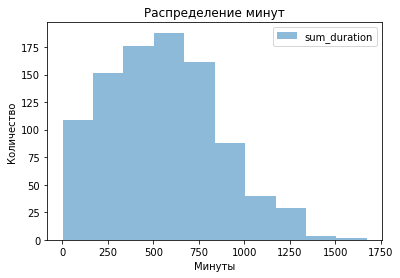

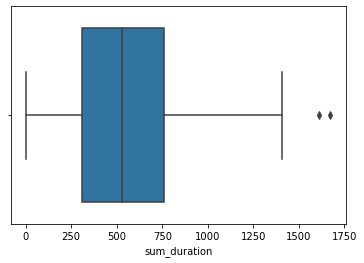

In [45]:
graphics(df[df['tariff']=='ultra'],'sum_duration', 'Распределение минут', 'Минуты', 'Количество')

**Вывод:**

Максимальное значение - 1673

Среднее значение - 547.76

Медиана - 529.00

Стандартное отклонение - 305.51

Дисперсия - 93338.43

Из гистограммы видим нормальное распределение, а так же видим очень небольшое количество выбросов.

##### Сообщения

In [46]:
df[df['tariff']=='ultra']['sum_sms_used'].describe()

count   795.00
mean     61.16
std      45.93
min       1.00
25%      24.00
50%      51.00
75%      87.50
max     224.00
Name: sum_sms_used, dtype: float64

In [47]:
#Вычислим дисперсию
sms_variance=round(np.var(df[df['tariff']=='ultra']['sum_sms_used'], ddof=1), (2))
sms_variance

2109.66

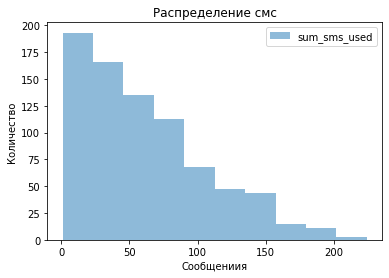

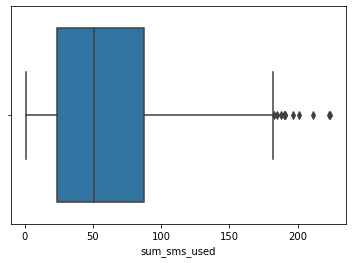

In [48]:
graphics(df[df['tariff']=='ultra'],'sum_sms_used','Распределение смс', 'Cообщениия', 'Количество')

**Вывод:**

Максимальное значение - 224

Среднее значение - 61.16

Медиана - 51.00

Стандартное отклонение - 45.93

Дисперсия - 2109.66

Из гистограммы видим распределение Пуассона, а так же видим больше количество выбросов.

##### Трафик

In [49]:
df[df['tariff']=='ultra']['sum_mb_used'].describe()

count     975.00
mean    19686.77
std      9952.06
min         0.00
25%     12020.50
50%     19411.00
75%     26920.50
max     49789.00
Name: sum_mb_used, dtype: float64

In [50]:
#Вычслим дисперисию
interet_variance=round(np.var(df[df['tariff']=='ultra']['sum_mb_used'], ddof=1), 2)
interet_variance

99043439.61

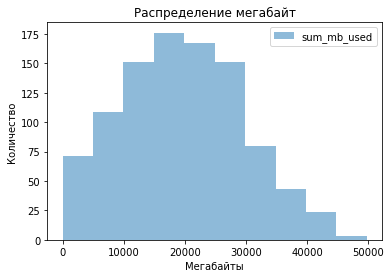

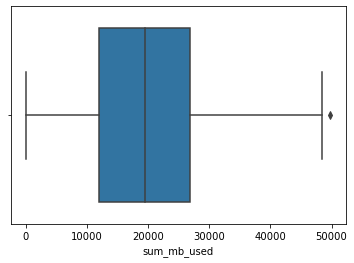

In [51]:
graphics(df[df['tariff']=='ultra'],'sum_mb_used','Распределение мегабайт', 'Мегабайты', 'Количество')

**Вывод:**

-Максимальное значение - 49789.00

-Среднее значение - 19686.77

-Медиана - 19411.00

-Стандартное отклонение - 9952.06

-Дисперсия - 99043439.61

Из гистограммы видим нормальное распределение, а так же видим небольшое количество данных.



##### Вывод

Мы получили все необходимые данные для тарифа "ultra". Теперь нам необходимо провести ту же работу для тарифа smart.

#### Тариф smart

При помощи логической индексации выберем тариф "smart" и вычислим все необходимы данные. Для вычисления дисперсии учтем, что у нас выборка из совокупности

##### Минуты

In [52]:
df[df['tariff']=='smart']['sum_duration'].describe()

count   2221.00
mean     419.44
std      188.99
min        2.00
25%      285.00
50%      423.00
75%      546.00
max     1435.00
Name: sum_duration, dtype: float64

In [53]:
minute_variance=round(np.var(df[df['tariff']=='smart']['sum_duration'], ddof=1),2)
minute_variance

35718.13

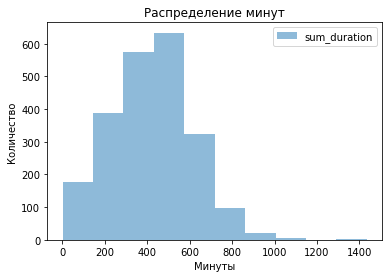

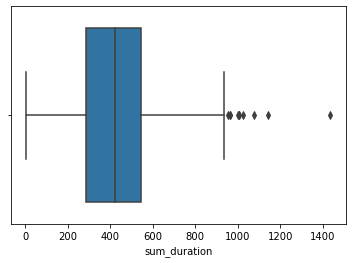

In [54]:
graphics(df[df['tariff']=='smart'],'sum_duration','Распределение минут', 'Минуты', 'Количество')

**Вывод:**

Максимальное значение - 1435

Среднее значение - 419.44

Медиана - 423.00

Стандартное отклонение - 188.99

Дисперсия - 35718.13

Из гистограммы видим нормальное распределение, а так же видим большое количество выбросов.

##### Сообщения

In [55]:
df[df['tariff']=='smart']['sum_sms_used'].describe()

count   1922.00
mean      38.72
std       26.79
min        1.00
25%       17.00
50%       34.00
75%       55.00
max      143.00
Name: sum_sms_used, dtype: float64

In [56]:
#Вычислим дисперсию
sms_variance=round(np.var(df[df['tariff']=='smart']['sum_sms_used'], ddof=1), 2)
sms_variance

717.59

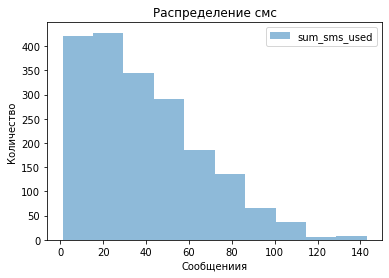

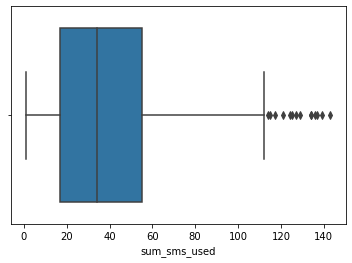

In [57]:
graphics(df[df['tariff']=='smart'],'sum_sms_used' ,'Распределение смс', 'Cообщениия', 'Количество')

**Вывод:**

Максимальное значение - 143.00

Среднее значение - 38.72

Медиана - 34.00

Стандартное отклонение - 29.79

Дисперсия - 717.59

Из гистограммы видим распределение Пуассона, а так же видим больше количество выбросов.

##### Трафик

In [58]:
df[df['tariff']=='smart']['sum_mb_used'].describe()

count    2228.00
mean    16236.47
std      5868.82
min         0.00
25%     12668.50
50%     16532.00
75%     20068.00
max     38610.00
Name: sum_mb_used, dtype: float64

In [59]:
#Вычслим дисперисию
interet_variance=round(np.var(df[df['tariff']=='smart']['sum_mb_used'], ddof=1),2)
interet_variance

34443100.68

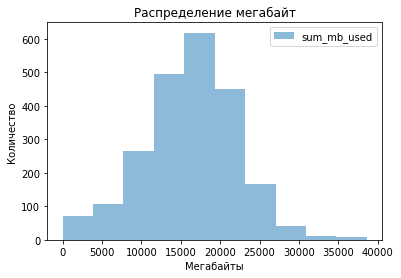

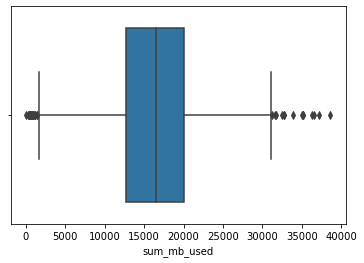

In [60]:
graphics(df[df['tariff']=='smart'], 'sum_mb_used','Распределение мегабайт', 'Мегабайты', 'Количество')

**Вывод:**

-Максимальное значение - 38610.00

-Среднее значение - 16236.47

-Медиана - 16532.00

-Стандартное отклонение - 5868.82

-Дисперсия - 34443100.68

Из гистограммы видим нормальное распределение, а так же видим большое количество выбросов в обе стороны.

Важно подметить - данные чуть скошены вылево, мидиана чуть больше среднего значения.

##### Вывод

Мы получили все необходимые данные для тарифа "smart". Теперь нам необходимо сравнить данные.

### Вывод:

**Звонки:**

В среднем по тарифу "Ультра" люди больше разговаривают (548 минут против 419 минут на смарте)
Среднее значение больше медианы - делаем вывод, что данные "скошены" вправо.

Разброс данных по на "Ультре" шире (306 против 189 на смарте)

Дисперсия почти в три раза выше на "ультре" (93338 против 35178)

**Сообщения:**

В среднем по тарифу "Ультра" люди отправляют больше сообщений (61 сообщение против 38 сообщений на смарте)
Среднее значение больше медианы - делаем вывод, что данные "скошены" вправо.

Разброс данных так же шире (45 против 29)

Дисперсия почти в три раза выше на "ультре" (2109 против 717 на смарте)

**Трафик:**

В среднем по тарифу "Ультра" люди потребляют больше контента (19686.77 мб против 16236.47 на смарте)
Скошенность данных разница в тарифах: на ультре скошенность вправо, на смарте влево (но не значительно).

Разброс данных больше на "ультре" (9952 против 5869 на смарте)

Дисперсия почти в три раза выше на "ультре" (99млн против 34млн на смарте)

**Сравнительный вывод**

В среднем люди на ультре разговаривают на 23% минут больше. Отправляют почти в 2 раза больше сообщений, и потребляют контента на 17% больше.

## Проверка гипотез

По заданию в этой главе нам необходимо проверить следующие гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Прежде чем приступить к проверке гипотез - нам необходимо проанализировать выручку на разных тарифах

### Выручка "Ultra"

In [61]:
df[df['tariff']=='ultra']['revenue'].describe()

count    985.00
mean    2071.07
std      378.80
min     1950.00
25%     1950.00
50%     1950.00
75%     1950.00
max     4800.00
Name: revenue, dtype: float64

In [62]:
#Вычслим дисперисию
revenue_variance=round(np.var(df[df['tariff']=='ultra']['revenue'], ddof=1),2)
revenue_variance

143491.24

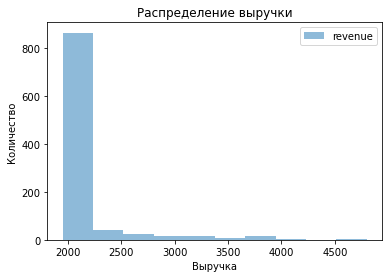

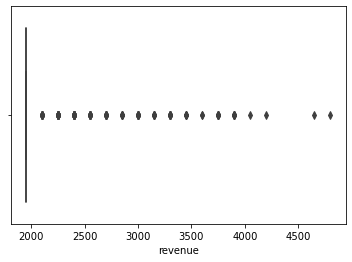

In [63]:
graphics(df[df['tariff']=='ultra'], 'revenue','Распределение выручки', 'Выручка', 'Количество')

**Вывод:**

Средняя выручка больше медианной - данные скошены вправо. Так же мы видим на гистограмме у нас есть выручка больше стандартной оплаты по тарифу и у нас есть большое количество выбросов - следовательно у нас есть пользователи кто выходят за лимиты тарифа. И так как данные скошены вправо- таких людей больше.

### Выручка "Smart"

In [64]:
df[df['tariff']=='smart']['revenue'].describe()

count   2229.00
mean    1294.64
std      820.93
min      550.00
25%      550.00
50%     1038.00
75%     1750.00
max     6770.00
Name: revenue, dtype: float64

In [65]:
#Вычслим дисперисию
revenue_variance=round(np.var(df[df['tariff']=='smart']['revenue'], ddof=1),2)
revenue_variance

673931.32

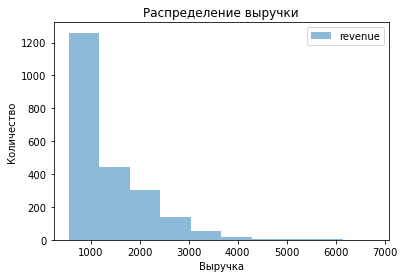

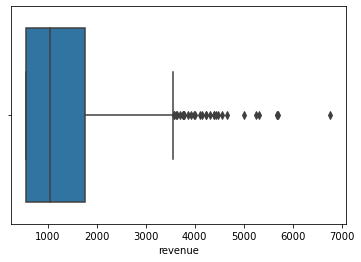

In [66]:
graphics(df[df['tariff']=='smart'], 'revenue','Распределение выручки', 'Выручка', 'Количество')

**Вывод:**

Средняя выручка больше медианной - данные скошены вправо. Так же мы видим на гистограмме- у нас есть выручка больше стандартной оплаты по тарифу и у нас есть большое количество выбросов.  Мы видим, что и медиана почти в 2 раза больше чем плата по тарифу. Это значит, что очень больше количество клиентов не укладывается в лимиты и докупают услуги у компании.

### Построение и проверка нулевой гипотезы для сравнения средней выручки "Ультра" и "Смарт":

Как мы знаем нулевая гипотеза должна строится с использованием знака равенства, тогда нулевая гипотеза будет звучать следующим образом:

"Средняя выручка пользователей тарифов "Ультра и "Смарт" - равна."

Проверим гипотезу, при этом критический уровень статистической значимости будем использовать 0.05

In [67]:
alpha=0.05

results = st.ttest_ind(df[df['tariff']=='ultra']['revenue'].dropna(), df[df['tariff']=='smart']['revenue'].dropna())
#так как у нас данные из единой совокупности, примем equal_var = True

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


**Вывод:**
Полученное значение p-value говорит о том, что хотя средние значения выручки неодинаковы - очень низкая вероятность, что такое большое различие можно получить случайно. Мы можем делать вывод о значимом различии между среднией выручкой по тарифам.

### Построение и проверка нулевой гипотезы для сравнения средней выручки пользователей из Москвы и других регионов.

Как мы знаем нулевая гипотеза должна строится с использованием знака равенства, тогда нулевая гипотеза будет звучать следующим образом:

"Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов".

Проверим данные и гипотезу, при этом критический уровень статистической значимости будем использовать 0.05

In [68]:
df[df['city']=='Москва']['revenue'].describe()

count    611.00
mean    1550.81
std      752.45
min      550.00
25%      798.00
50%     1750.00
75%     1950.00
max     5321.00
Name: revenue, dtype: float64

In [69]:
df[df['city']!='Москва']['revenue'].describe()

count   2603.00
mean    1528.32
std      810.41
min      550.00
25%      750.00
50%     1587.00
75%     1950.00
max     6770.00
Name: revenue, dtype: float64

Видим, что средняя выручка в Москве выше и данные скошены влево в обоих случаях.
Приступим к проверке гипотезы:                                                                                                 

In [70]:
alpha=0.05

results = st.ttest_ind(df[df['city']=='Москва']['revenue'].dropna(), df[df['city']!='Москва']['revenue'].dropna())
#так как у нас данные из единой совокупности, примем equal_var = True

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
Полученное значение p-value говорит о том, что хотя средние значения выручки неодинаковы. Вероятность 12%, что такое большое различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними.

## Вывод:

Мы провели анализ тарифов на небольшой выборке клиентов. Мы видим, что клиенты с тарифом смарт чаще клиентов с тарифом ультра выходят за лимиты. Им приходится докупать минуты/сообщения/трафик. Таким образом клиентам котрые "вываливаются" за лимиты - можно предложить перейти на тариф Ультра. Что касается корректировки рекламного бюджета-следует уделить внимание тарифу Ультра и продвигать его, средняя выручка по данному тарифу выше нежели на смарте. Рекламная компания может проходить по всей России, так как нам не удалось отвергнуть гипотезу равенства средней выручки в Москкве и других регионов. Люди общаются и используют интеренет по всей России примерно одинаково.